# Data understanding
This notebook is made to explore the structure in the data and the relations beyween the variables and understand the context captured in this files.
The goal of this first notebook is to formulate relevant questions to make insights about Github developer survey data and propose some interesting questions based on the questions made.

## Data
The data chosed for this analysis is the AirBnB data for housing prices in the Boston city.
The dataset can be found on [this link](https://www.kaggle.com/airbnb/boston)

In [1]:
! ls data/

survey_results_public.csv  survey_results_schema.csv


In [2]:
# import libraries
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
data_dir = Path('data')
survey_df = pd.read_csv(str(data_dir / 'survey_results_public.csv'))
schema_df = pd.read_csv(str(data_dir / 'survey_results_schema.csv'))

## Utils

In [59]:
def plot_mean_by(df, group_by, mean_column, horizontal=True):
    tmp = df[[group_by, mean_column]].groupby(group_by).mean()
    tmp = tmp.sort_values(mean_column)
    if horizontal:
        tmp.plot.barh();
    else:
        tmp.plot.bar();

## Structure of the data

### Survey

Contains information about developers using github and the answers to a list of questions made in the survey.

In [4]:
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


### Schema
This dataset is a data dictionary containing the descriptions of the columns in `survey_df` dataset.

In [6]:
schema_df.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


## Data Exploration

Looking at the data in the schemma I think that the column `JobSatisfaction` may be interesting since we can see which characteristics make a developer feel satisfaction for its job.

First we are going to separate people which current `EmploymentStatus` is Employed full-time or Employed part-time, which may be the developers who work in a company.

In [38]:
df = survey_df[(survey_df.EmploymentStatus == "Employed full-time") 
               | (survey_df.EmploymentStatus == "Employed part-time")]

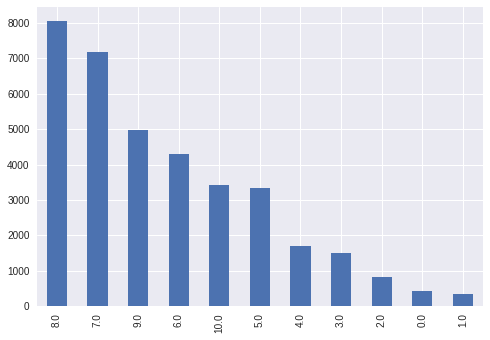

In [55]:
interest_var = "JobSatisfaction"
df[interest_var].value_counts().plot.bar();

In general we can see there is a good rate of job satisfaction among developers, lets see what aspects of a job  makes a developer feel satisfied wth his job. The columns we are going to analyse further in this notebook are those which I think a job can offer.

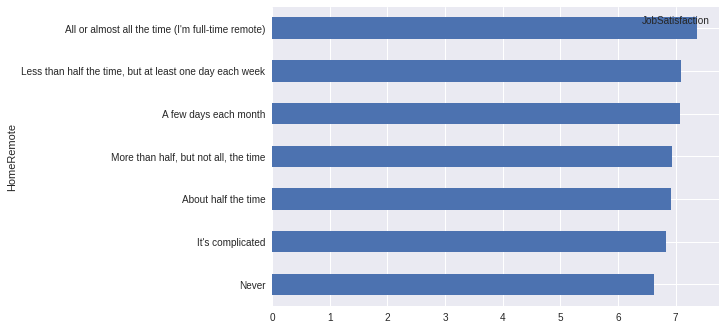

In [60]:
plot_mean_by(df, "HomeRemote", interest_var)

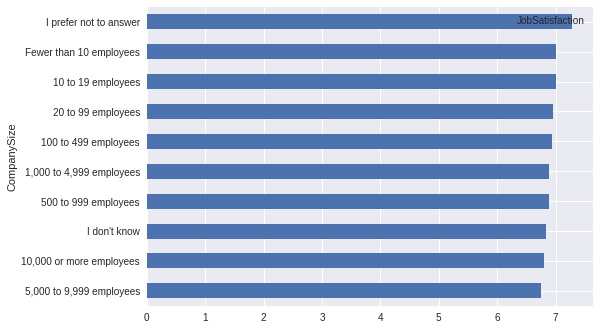

In [62]:
plot_mean_by(df, "CompanySize", interest_var)

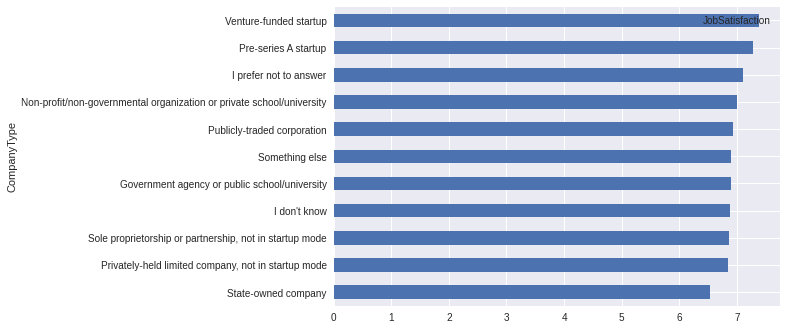

In [63]:
plot_mean_by(df, "CompanyType", interest_var)

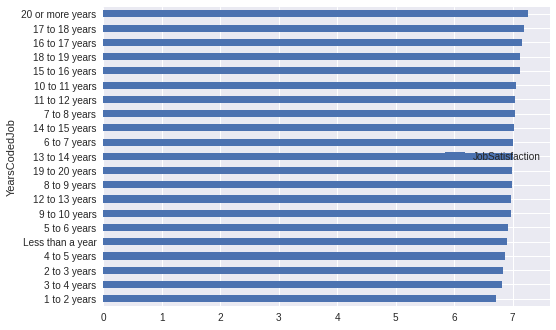

In [64]:
plot_mean_by(df, "YearsCodedJob", interest_var)

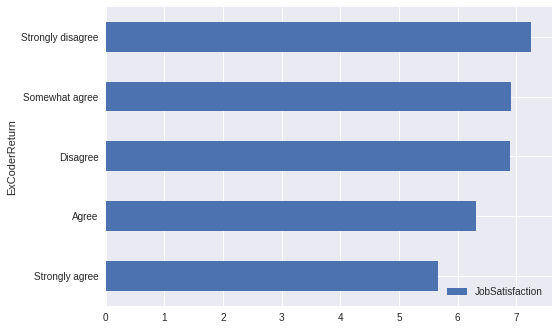

In [67]:
plot_mean_by(df, "ExCoderReturn", interest_var)

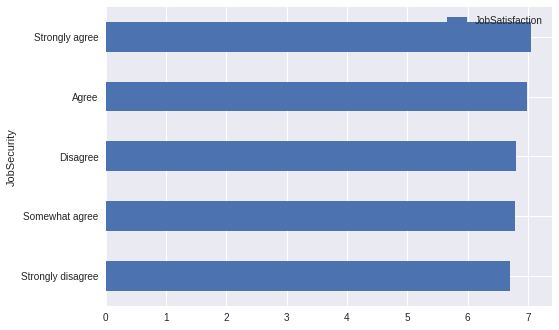

In [61]:
plot_mean_by(df, "JobSecurity", interest_var)

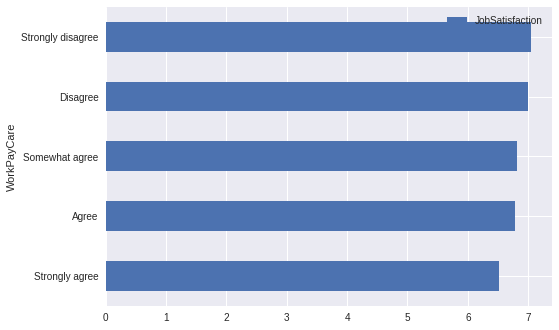

In [44]:
plot_mean_by(df, "HomeRemote", interest_var)

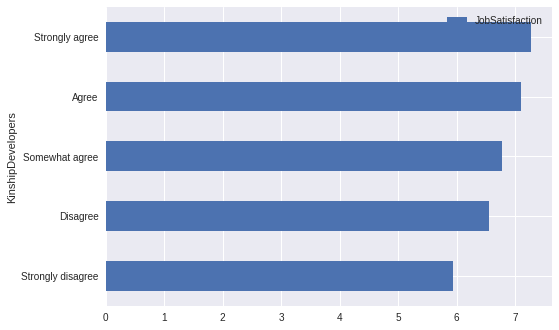

In [45]:
comp_var = "KinshipDevelopers"
tmp = df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("JobSatisfaction")
tmp.plot.barh();

In [46]:
from collections import defaultdict

comp_var = "ImportantBenefits"
benefits_count = defaultdict(int)
for value in df["ImportantBenefits"]:
    if type(value) == str:
        for benefit in value.split(';'):
            benefits_count[benefit.strip()] += 1

In [47]:
benefits_df = pd.DataFrame(list(benefits_count.items()), columns=["benefit", "frec"])
benefits_df.set_index("benefit", inplace=True)

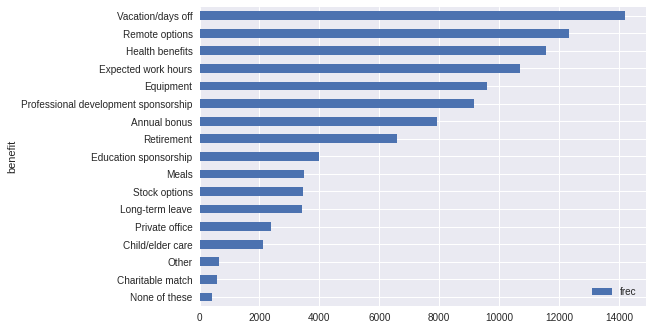

In [48]:
benefits_df.sort_values('frec').plot.barh();

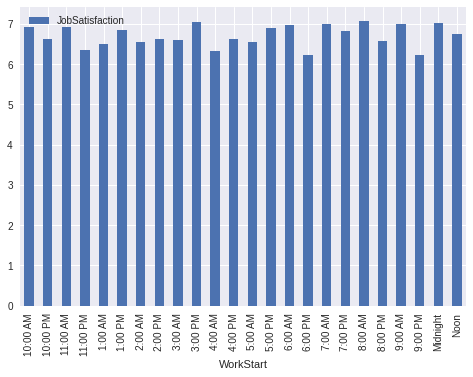

In [49]:
comp_var = "WorkStart"
tmp = df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("WorkStart")
tmp.plot.bar();

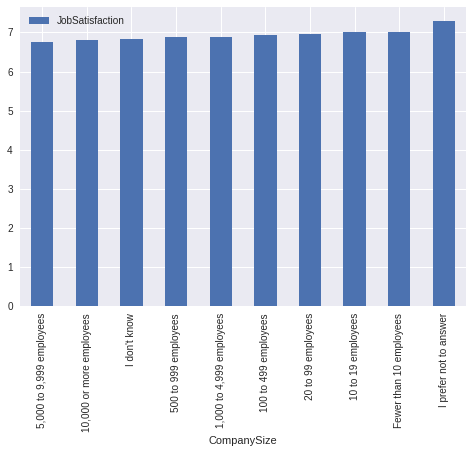

In [52]:
comp_var = "CompanySize"
tmp = df[[comp_var, "JobSatisfaction"]].groupby(comp_var).mean()
tmp = tmp.sort_values("JobSatisfaction")
tmp.plot.bar();

In [53]:
survey_df["CompanyType"].value_counts()

Privately-held limited company, not in startup mode                      16709
Publicly-traded corporation                                               5871
I don't know                                                              3233
Sole proprietorship or partnership, not in startup mode                   2831
Government agency or public school/university                             2451
Venture-funded startup                                                    2387
I prefer not to answer                                                    1816
Pre-series A startup                                                      1288
Non-profit/non-governmental organization or private school/university     1225
State-owned company                                                        670
Something else                                                             342
Name: CompanyType, dtype: int64